# Import the library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
sns.set_style('darkgrid')
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

# Read CSV

In [2]:
data = pd.read_csv('../dataset/train.csv')
test = pd.read_csv('../dataset/test.csv')

In [3]:
target = data['SalePrice']
test_ids = test['Id']

# Features Selections

## Identifies the column with numerical values

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data1 = data.select_dtypes(include=numerics)
test1 = test.select_dtypes(include=numerics)

## Identifies the correlation between the numerical columns and sales Price

### 12 Features selected

In [5]:
important_num_cols = list(data1.corr()["SalePrice"][(data1.corr()["SalePrice"]>0.50) | (data1.corr()["SalePrice"]<-0.50)].index)

In [6]:
cat_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Functional', 'BldgType', 'HouseStyle', 'GarageCond']
important_cols = important_num_cols + cat_cols
important_cols.remove('SalePrice')

### 7 Features selected

In [7]:
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_7_cols = important_num_cols + cat_cols
important_7_cols.remove('SalePrice')

# Data Preprocessing

## Combine Train and Test

### 12 Cat_Features selected

In [8]:
data2 = data[important_cols]
test2 = test[important_cols]

data3 = pd.concat([data2, test2], axis=0).reset_index(drop=True)

data4 = data3.copy()

data4

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Functional,BldgType,HouseStyle,GarageCond
0,7,2003,2003,856.0,856,1710,2,8,2.0,548.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Typ,1Fam,2Story,TA
1,6,1976,1976,1262.0,1262,1262,2,6,2.0,460.0,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Typ,1Fam,1Story,TA
2,7,2001,2002,920.0,920,1786,2,6,2.0,608.0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Typ,1Fam,2Story,TA
3,7,1915,1970,756.0,961,1717,1,7,3.0,642.0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Typ,1Fam,2Story,TA
4,8,2000,2000,1145.0,1145,2198,2,9,3.0,836.0,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Typ,1Fam,2Story,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,4,1970,1970,546.0,546,1092,1,5,0.0,0.0,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Typ,Twnhs,2Story,NaN
2915,4,1970,1970,546.0,546,1092,1,6,1.0,286.0,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Typ,TwnhsE,2Story,TA
2916,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Typ,1Fam,1Story,TA
2917,5,1992,1992,912.0,970,970,1,6,0.0,0.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Typ,1Fam,SFoyer,NaN


### 7 Cat_Features selected

In [9]:
sel_7_data2 = data[important_7_cols]
sel_7_test2 = test[important_7_cols]

sel_7_data3 = pd.concat([sel_7_data2, sel_7_test2], axis=0).reset_index(drop=True)

sel_7_data4 = sel_7_data3.copy()

sel_7_data4

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856.0,856,1710,2,8,2.0,548.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,1262.0,1262,1262,2,6,2.0,460.0,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,920.0,920,1786,2,6,2.0,608.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,756.0,961,1717,1,7,3.0,642.0,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,1145.0,1145,2198,2,9,3.0,836.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,4,1970,1970,546.0,546,1092,1,5,0.0,0.0,RM,AllPub,Twnhs,GasA,TA,Normal,Gtl
2915,4,1970,1970,546.0,546,1092,1,6,1.0,286.0,RM,AllPub,TwnhsE,GasA,TA,Abnorml,Gtl
2916,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0,RL,AllPub,1Fam,GasA,TA,Abnorml,Gtl
2917,5,1992,1992,912.0,970,970,1,6,0.0,0.0,RL,AllPub,1Fam,GasA,TA,Normal,Gtl


## Finding the null columns

### Feature 12

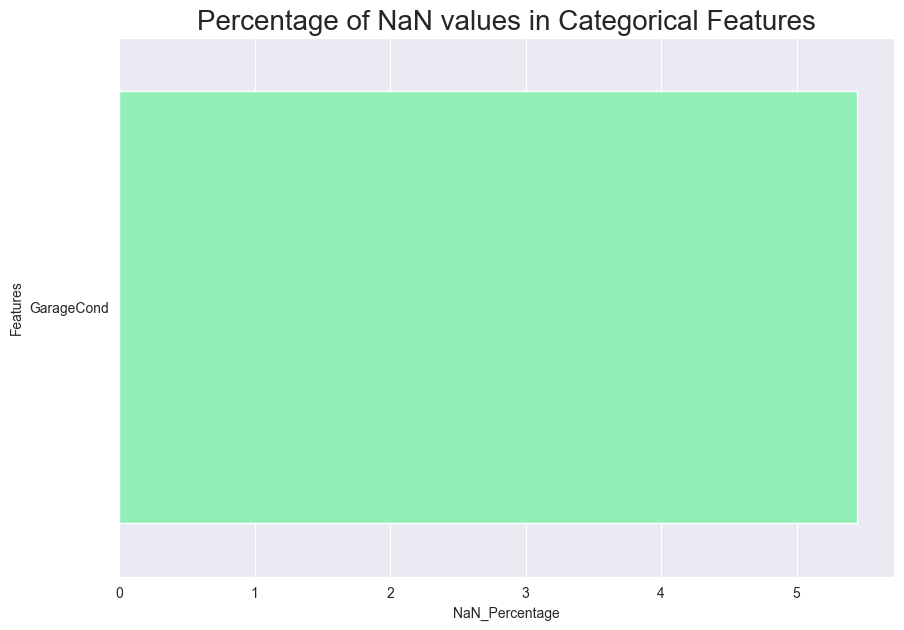

We can remove features with NaN values that are more than 50%.


In [10]:
features_null_prcnt = []
features_drop_list = []
exceed_prcnt = 50
columns = data4.columns
for col in columns:
    prcnt = len(data4[col][data4[col].isna() == True]) / len(data4[col])*100
    if (prcnt > exceed_prcnt):
        features_drop_list.append(col)
    features_null_prcnt.append(prcnt)
Nan_values = pd.DataFrame({'Features' : columns, 'NaN_Percentage': features_null_prcnt}).sort_values(by = 'NaN_Percentage', ascending = False)
Nan_values = Nan_values[Nan_values.NaN_Percentage > 1]
 
plt.figure(figsize=(10,7))
plt.title('Percentage of NaN values in Categorical Features', size = 20)
plt.xlabel("Features with Highest NaN values")
sns.barplot(x = Nan_values.NaN_Percentage, y = Nan_values.Features, orient = 'h', palette = 'rainbow')
plt.show()
print('We can remove features with NaN values that are more than ' + str(exceed_prcnt) + '%.')

Remarks: Since features 7 have not significantly null cols, there're skipped

## Fill Categorical Missing Values

### 12 Cat_Features selected

In [11]:
for column in [
    'GarageCond'
]:
    data4[column] = data4[column].fillna('None')

# Impute using the column mode
for column in [
'MSZoning', 
'Street', 
'LotShape', 
'LandContour', 
'Utilities', 
'LotConfig', 
'LandSlope', 
'Neighborhood', 
'Functional', 
'BldgType', 
'HouseStyle'
]:
    data4[column] = data4[column].fillna(data4[column].mode()[0])

In [12]:
data5 = data4.copy()

### 7 cat_Features selected

In [13]:
# Impute using the column mode
for column in [
    'MSZoning',
    'Utilities',
    'BldgType',
    'Heating',
    'KitchenQual',
    'SaleCondition',
    'LandSlope'
]:
    sel_7_data4[column] = sel_7_data4[column].fillna(sel_7_data4[column].mode()[0])

In [14]:

sel_7_data5 = sel_7_data4.copy()

## Fill Numeric Missing Values

### Find the Numerical nan values

In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
print("Missing Values by Column")
print("-"*30)
print(data5.select_dtypes(include=numerics).isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",data5.isna().sum().sum())

Missing Values by Column
------------------------------
OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     1
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      1
GarageArea      1
dtype: int64
------------------------------
TOTAL MISSING VALUES: 3


### KNN methods

In [16]:
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [17]:
for column in [
    'TotalBsmtSF',
    'GarageCars',
    'GarageArea'
]:
    data5 = knn_impute(data5, column)
    sel_7_data5 = knn_impute(sel_7_data5, column)

In [19]:
data6 = data5.copy()
sel_7_data6 = sel_7_data5.copy()

Remarks: It is used for numerical values, which is not affected by the categories features selection

# Feature Transformations

## Normalization for Skewed Features

In [20]:
skew_df = pd.DataFrame(data5.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data6[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,OverallQual,0.197110,0.197110,False
1,YearBuilt,-0.599806,0.599806,True
2,YearRemodAdd,-0.451020,0.451020,False
3,TotalBsmtSF,1.162762,1.162762,True
4,1stFlrSF,1.469604,1.469604,True
5,GrLivArea,1.269358,1.269358,True
6,FullBath,0.167606,0.167606,False
7,TotRmsAbvGrd,0.758367,0.758367,True
8,GarageCars,-0.217612,0.217612,False
9,GarageArea,0.241792,0.241792,False


In [21]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    data6[column] = np.log1p(data6[column])
    sel_7_data6[column] = np.log1p(sel_7_data6[column])

Remarks: It is used for numerical values, which is not affected by the categories features selection

### Comparisons

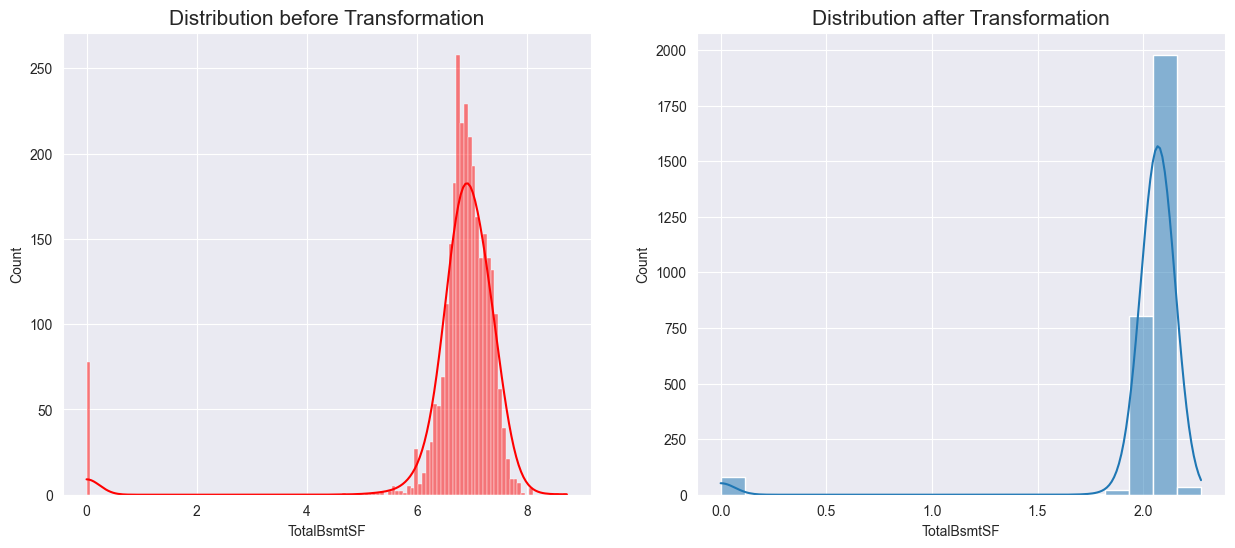

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Distribution before Transformation", fontsize=15)
sns.histplot(data6['TotalBsmtSF'], kde=True, color="red")
plt.subplot(1,2,2)

plt.title("Distribution after Transformation", fontsize=15)
sns.histplot(np.log1p(data6['TotalBsmtSF']),bins=20, kde=True , legend=False)
plt.xlabel('TotalBsmtSF')
plt.show()

In [23]:
data7 = data6.copy()
sel_7_data7 = sel_7_data6.copy()

# Encode Categoricals

In [24]:
data7 = pd.get_dummies(data7)
sel_7_data7 = pd.get_dummies(sel_7_data7)
sel_7_data8 = sel_7_data7.copy()
data8 = data7.copy()

In [25]:
data7

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA
0,7,7.602900,2003,6.753438,6.753438,7.444833,2,2.197225,2.0,548.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,6,7.589336,1976,7.141245,7.141245,7.141245,2,1.945910,2.0,460.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,7,7.601902,2002,6.825460,6.825460,7.488294,2,1.945910,2.0,608.0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,7,7.557995,1970,6.629363,6.869014,7.448916,1,2.079442,3.0,642.0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,8,7.601402,2000,7.044033,7.044033,7.695758,2,2.302585,3.0,836.0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,4,7.586296,1970,6.304449,6.304449,6.996681,1,1.791759,0.0,0.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2915,4,7.586296,1970,6.304449,6.304449,6.996681,1,1.945910,1.0,286.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2916,5,7.581210,1996,7.110696,7.110696,7.110696,1,2.079442,2.0,576.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2917,5,7.597396,1992,6.816736,6.878326,6.878326,1,1.945910,0.0,0.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


Remarks: It is used for numerical values, which is not affected by the categories features selection

# Scaling

## StandardScaler

In [26]:
scaler = StandardScaler()
scaler.fit(data8)

data8 = pd.DataFrame(scaler.transform(data8), index=data8.index, columns=data8.columns)

In [27]:
scaler = StandardScaler()
scaler.fit(sel_7_data8)

sel_7_data8 = pd.DataFrame(scaler.transform(sel_7_data8), index=sel_7_data8.index, columns=sel_7_data8.columns)

Remarks: It is used for numerical values, which is not affected by the categories features selection

### Comparisons


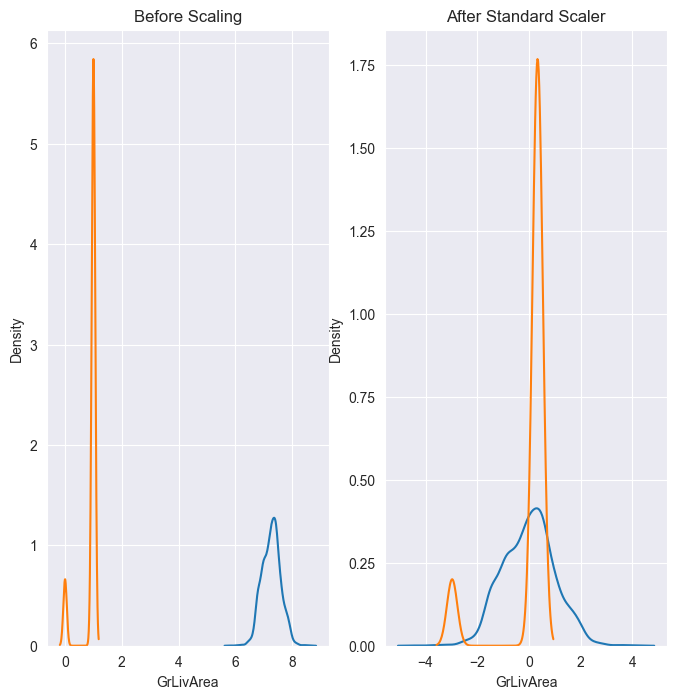

In [28]:
fig , (ob1, ob2) = plt.subplots(ncols = 2, figsize=(8,8))
ob1.set_title('Before Scaling')
sns.kdeplot(data7['GrLivArea'],ax=ob1)
sns.kdeplot(data7['LandContour_Lvl'],ax=ob1)

ob2.set_title('After Standard Scaler')
sns.kdeplot(data8['GrLivArea'],ax=ob2)
sns.kdeplot(data8['LandContour_Lvl'],ax=ob2)

plt.show()

In [29]:
data9 = data8.copy()
sel_7_data9 = sel_7_data8.copy()

# Target Transform

We can now observe normal distribution


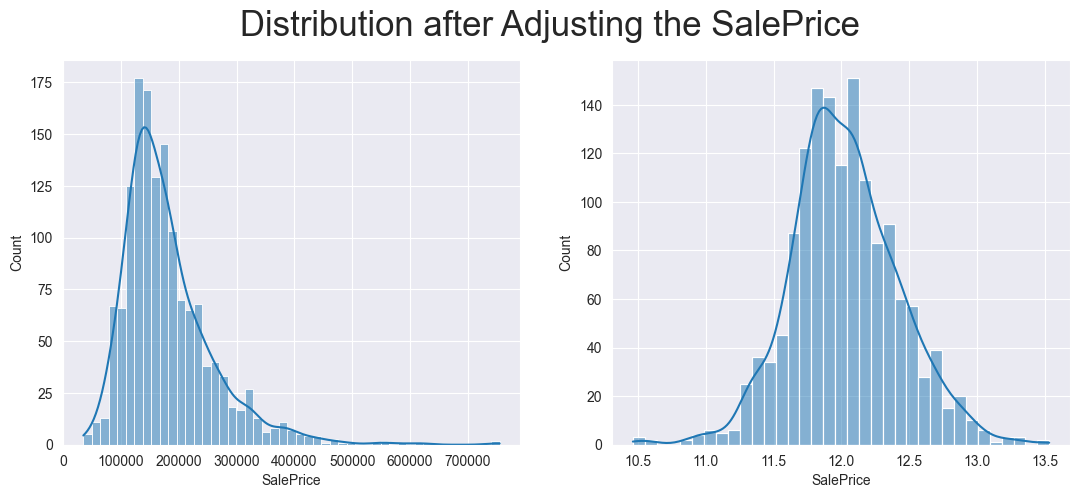

In [30]:
fig, axes = plt.subplots(1,2, figsize=(13, 5), sharey=False)
fig.suptitle('Distribution after Adjusting the SalePrice', size=25)
sns.histplot(target, ax=axes[0], kde=True)
sns.histplot(np.log(target), ax=axes[1], kde=True)
print('We can now observe normal distribution')

In [31]:
log_target = np.log(target)

# Split Data

## Sel_12_Features

In [32]:
train_final = data9.loc[:data.index.max(), :].copy()
test_final = data9.loc[data.index.max() + 1:, :].reset_index(drop=True).copy()

In [33]:
train_final

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA
0,0.646183,1.040634,0.896833,0.017247,-0.777287,0.564627,0.781366,1.016638,0.306754,0.349161,-0.092944,-0.223607,-0.094801,0.535229,-0.432513,-0.064249,0.064249,-0.704383,-0.1635,-0.07424,0.755115,-0.204343,-0.207057,-0.144867,0.33656,0.018512,-0.018512,-0.460662,-0.253305,-0.173185,-0.069421,0.607038,0.225291,-0.211515,-0.07424,-0.098414,-0.058631,-0.101903,-0.196011,-0.123711,3.151600,-0.191250,-0.266820,-0.244771,-0.181408,-0.113306,-0.201598,-0.422987,-0.089118,-0.216765,-0.157892,-0.245556,-0.298629,-0.129302,-0.233564,-0.211515,-0.257869,-0.133351,-0.159028,-0.091050,-0.080943,-0.055613,-0.150914,-0.156748,-0.110163,-0.026185,0.271213,0.451344,-0.147313,-0.196952,-0.184408,-0.290386,-0.347185,-0.080943,-1.007911,-0.052423,-0.09105,1.532148,-0.171075,-0.214153,-0.032075,-0.161278,-0.07187,-0.240018,-0.069421,0.315989
1,-0.063185,0.161526,-0.395604,0.347106,0.424865,-0.370371,0.781366,-0.198448,0.306754,-0.059473,-0.092944,-0.223607,-0.094801,0.535229,-0.432513,-0.064249,0.064249,-0.704383,-0.1635,-0.07424,0.755115,-0.204343,-0.207057,-0.144867,0.33656,0.018512,-0.018512,-0.460662,-0.253305,5.774182,-0.069421,-1.647343,0.225291,-0.211515,-0.07424,-0.098414,-0.058631,-0.101903,-0.196011,-0.123711,-0.317299,-0.191250,-0.266820,-0.244771,-0.181408,-0.113306,-0.201598,-0.422987,-0.089118,-0.216765,-0.157892,-0.245556,-0.298629,-0.129302,-0.233564,-0.211515,-0.257869,-0.133351,-0.159028,10.982941,-0.080943,-0.055613,-0.150914,-0.156748,-0.110163,-0.026185,0.271213,0.451344,-0.147313,-0.196952,-0.184408,-0.290386,-0.347185,-0.080943,0.992151,-0.052423,-0.09105,-0.652679,-0.171075,-0.214153,-0.032075,-0.161278,-0.07187,-0.240018,-0.069421,0.315989
2,0.646183,0.975922,0.848965,0.078507,-0.554028,0.698477,0.781366,-0.198448,0.306754,0.627776,-0.092944,-0.223607,-0.094801,0.535229,-0.432513,-0.064249,0.064249,1.419682,-0.1635,-0.07424,-1.324301,-0.204343,-0.207057,-0.144867,0.33656,0.018512,-0.018512,-0.460662,-0.253305,-0.173185,-0.069421,0.607038,0.225291,-0.211515,-0.07424,-0.098414,-0.058631,-0.101903,-0.196011,-0.123711,3.151600,-0.191250,-0.266820,-0.244771,-0.181408,-0.113306,-0.201598,-0.422987,-0.089118,-0.216765,-0.157892,-0.245556,-0.298629,-0.129302,-0.233564,-0.211515,-0.257869,-0.133351,-0.159028,-0.091050,-0.080943,-0.055613,-0.150914,-0.156748,-0.110163,-0.026185,0.271213,0.451344,-0.147313,-0.196952,-0.184408,-0.290386,-0.347185,-0.080943,-1.007911,-0.052423,-0.09105,1.532148,-0.171075,-0.214153,-0.032075,-0.161278,-0.07187,-0.240018,-0.069421,0.315989
3,0.646183,-1.869638,-0.682812,-0.088288,-0.419015,0.577201,-1.027363,0.447166,1.620062,0.

In [34]:
test_final

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA
0,-0.772552,-0.332070,-1.113625,0.042668,-0.635877,-1.424253,-1.027363,-0.943755,-1.006555,1.194292,-0.092944,-0.223607,10.548423,-1.868360,-0.432513,-0.064249,0.064249,-0.704383,-0.1635,-0.07424,0.755115,-0.204343,-0.207057,-0.144867,0.336560,0.018512,-0.018512,-0.460662,-0.253305,-0.173185,-0.069421,0.607038,0.225291,-0.211515,-0.07424,-0.098414,-0.058631,-0.101903,-0.196011,-0.123711,-0.317299,-0.19125,-0.26682,-0.244771,-0.181408,-0.113306,-0.201598,2.364141,-0.089118,-0.216765,-0.157892,-0.245556,-0.298629,-0.129302,-0.233564,-0.211515,-0.257869,-0.133351,-0.159028,-0.09105,-0.080943,-0.055613,-0.150914,-0.156748,-0.110163,-0.026185,0.271213,0.451344,-0.147313,-0.196952,-0.184408,-0.290386,-0.347185,-0.080943,0.992151,-0.052423,-0.09105,-0.652679,-0.171075,-0.214153,-0.032075,-0.161278,-0.07187,-0.240018,-0.069421,0.315989
1,-0.063185,-0.431241,-1.257229,0.391072,0.585094,-0.211177,-1.027363,-0.198448,-1.006555,-0.746722,-0.092944,-0.223607,-0.094801,0.535229,-0.432513,-0.064249,0.064249,1.419682,-0.1635,-0.07424,-1.324301,-0.204343,-0.207057,-0.144867,0.336560,0.018512,-0.018512,2.170790,-0.253305,-0.173185,-0.069421,-1.647343,0.225291,-0.211515,-0.07424,-0.098414,-0.058631,-0.101903,-0.196011,-0.123711,-0.317299,-0.19125,-0.26682,-0.244771,-0.181408,-0.113306,-0.201598,2.364141,-0.089118,-0.216765,-0.157892,-0.245556,-0.298629,-0.129302,-0.233564,-0.211515,-0.257869,-0.133351,-0.159028,-0.09105,-0.080943,-0.055613,-0.150914,-0.156748,-0.110163,-0.026185,0.271213,0.451344,-0.147313,-0.196952,-0.184408,-0.290386,-0.347185,-0.080943,0.992151,-0.052423,-0.09105,-0.652679,-0.171075,-0.214153,-0.032075,-0.161278,-0.07187,-0.240018,-0.069421,0.315989
2,-0.772552,0.846305,0.657493,0.085864,-0.527218,0.415262,0.781366,-0.198448,0.306754,0.042685,-0.092944,-0.223607,-0.094801,0.535229,-0.432513,-0.064249,0.064249,1.419682,-0.1635,-0.07424,-1.324301,-0.204343,-0.207057,-0.144867,0.336560,0.018512,-0.018512,-0.460662,-0.253305,-0.173185,-0.069421,0.607038,0.225291,-0.211515,-0.07424,-0.098414,-0.058631,-0.101903,-0.196011,-0.123711,-0.317299,-0.19125,-0.26682,4.085451,-0.181408,-0.113306,-0.201598,-0.422987,-0.089118,-0.216765,-0.157892,-0.245556,-0.298629,-0.129302,-0.233564,-0.211515,-0.257869,-0.133351,-0.159028,-0.09105,-0.080943,-0.055613,-0.150914,-0.156748,-0.110163,-0.026185,0.271213,0.451344,-0.147313,-0.196952,-0.184408,-0.290386,-0.347185,-0.080943,-1.007911,-0.052423,-0.09105,1.532148,-0.171075,-0.214153,-0.032075,-0.161278,-0.07187,-0.240018,-0.069421,0.315989
3,-0.063185,0.878733,0.657493,0.084030,-0.533898,0.367659,0.781366,0.447166,0.306754,

## Sel_7_Features

In [35]:
sel_7_train_final = sel_7_data9.loc[:data.index.max(), :].copy()
sel_7_test_final = sel_7_data9.loc[data.index.max() + 1:, :].reset_index(drop=True).copy()

# Models

## KNeighborsRegressor

In [37]:
sel_12_knn = KNeighborsRegressor()
sel_12_knn.fit(train_final, log_target)

KNeighborsRegressor()

In [38]:
sel_7_knn = KNeighborsRegressor()
sel_7_knn.fit(sel_7_train_final, log_target)

KNeighborsRegressor()

# Evaluate

In [39]:
results = {}

kf = KFold(n_splits=10)

sel12_knn_result = np.exp(np.sqrt(-cross_val_score(sel_12_knn, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
sel_7_knn_result = np.exp(np.sqrt(-cross_val_score(sel_7_knn, sel_7_train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
results[0] = sel12_knn_result
results[1] = sel_7_knn_result

In [40]:
print("-"*30)
print('KNN_sel_12')
print(np.mean(results[0]))
print(np.std(results[0]))
print("-"*30)
print('KNN_sel_7')
print(np.mean(results[1]))
print(np.std(results[1]))

------------------------------
KNN_sel_12
1.2298075866047267
0.024256735560378596
------------------------------
KNN_sel_7
1.2055464342029223
0.02379515421876231


# Predictions

In [41]:
final_knn_sel_12_prediction = np.exp(sel_12_knn.predict(test_final))

In [42]:
final_knn_sel_7_prediction = np.exp(sel_7_knn.predict(sel_7_test_final))


# Submission

In [43]:
submission_sel_12_knn = pd.concat([test_ids, pd.Series(final_knn_sel_12_prediction, name='SalePrice')], axis=1)

In [44]:
submission_sel_12_knn.to_csv('./submissions/submission_12_1010.csv', index=False, header=True)

In [45]:
submission_sel_7_knn = pd.concat([test_ids, pd.Series(final_knn_sel_7_prediction, name='SalePrice')], axis=1)

In [46]:
submission_sel_7_knn.to_csv('./submissions/submission_7_1010.csv', index=False, header=True)